# Nodes, Edges & Statistical (In)dependence

### Loading Libraries

In [2]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# IterTools
from itertools import combinations

# Statistical Models
from scipy import stats
import statsmodels.api as sm

# Networkx
import networkx as nx

# Data Visualization
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn
from sklearn.linear_model import LinearRegression

### Setting Color & Viz Parameters

In [3]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

In [4]:
plt.style.use('fivethirtyeight')

### Visualizations

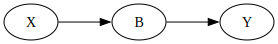

In [5]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!']

edges = ['XB', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_00')

graph

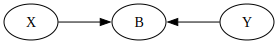

In [6]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'B', 'Y']
positions = ['1,0!', '2.5,0!', '4,0!']

edges = ['XB', 'YB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_01')

graph

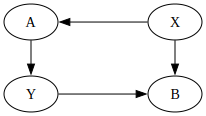

In [7]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1,1!', '3,1!', '3,0!', '1, 0!']

edges = ['XB', 'YB', 'XA', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_02')

graph

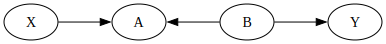

In [8]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y']
positions = ['1.5,0!', '0,0!', '3,0!', '4.5,0!']

edges = ['XA', 'BA', 'BY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_03')

graph

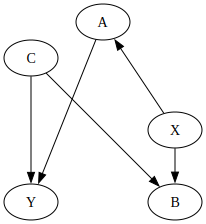

In [9]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'X', 'B', 'Y', 'C']
positions = ['2,2.5!', '3,1!', '3,0!', '1, 0!', '1,2!']

edges = ['XA', 'XB', 'CB', 'CY', 'AY']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_06_d_sep_04')

graph

### Estimand First!

In [10]:
# Commute example
t = [22.1, 23.7, 25.2, 20.0, 21.8]

In [11]:
np.mean(t)

22.56

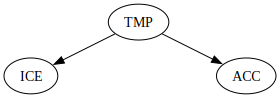

In [12]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['ICE', 'TMP', 'ACC']
positions = ['0,0!', '1.5,.75!', '3,0!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edge('TMP', 'ICE')
graph.edge('TMP', 'ACC')

graph.render(f'img/ch_06_icecream')

graph

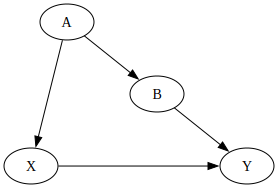

In [13]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(['XY', 'AX', 'AB', 'BY'])

graph.render(f'img/ch_06_equivalent_estimands_00')

graph

In [14]:
?graph.edge

Signature:
graph.edge(
    tail_name: str,
    head_name: str,
    label: Optional[str] = None,
    _attributes=None,
    **attrs,
) -> None
Docstring:
Create an edge between two nodes.

Args:
    tail_name: Start node identifier
        (format: ``node[:port[:compass]]``).
    head_name: End node identifier
        (format: ``node[:port[:compass]]``).
    label: Caption to be displayed near the edge.
    attrs: Any additional edge attributes (must be strings).

Note:
    The ``tail_name`` and ``head_name`` strings are separated
    by (optional) colon(s) into ``node`` name, ``port`` name,
    and ``compass`` (e.g. ``sw``).
    See :ref:`details in the User Guide <node-ports-compass>`.

Attention:
    When rendering ``label``, backslash-escapes
    and strings of the form ``<...>`` have a special meaning.
    See the sections :ref:`backslash-escapes` and
    :ref:`quoting-and-html-like-labels` in the user guide for details.
File:      ~/anaconda3/envs/CAUSINF/lib/python3.11/site-packag

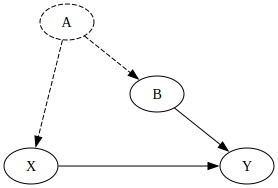

In [15]:
graph = graphviz.Digraph(format='png', engine='neato')


nodes = ['X', 'Y', 'A', 'B']
positions = ['0,0!', '3,0!', '.5,2!', '1.75,1!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('A', style='dashed')

graph.edges(['XY', 'BY'])
graph.edge('A', 'X', style='dashed')
graph.edge('A', 'B', style='dashed')

graph.render(f'img/ch_06_equivalent_estimands_01')

graph

### Front-Door Criterion

In [18]:
from dowhy.causal_model import CausalModel

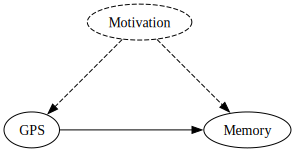

In [19]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Memory', 'Motivation']
positions = ['0,0!', '3,0!', '1.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Memory')

graph.render(f'img/ch_06_gps_01')

graph

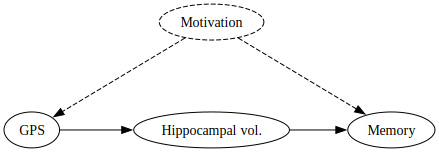

In [20]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['GPS', 'Hippocampal vol.', 'Memory', 'Motivation']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('Motivation', style='dashed')

graph.edge('Motivation', 'GPS', style='dashed')
graph.edge('Motivation', 'Memory', style='dashed')
graph.edge('GPS', 'Hippocampal vol.')
graph.edge('Hippocampal vol.', 'Memory')

graph.render(f'img/ch_06_gps_02')

graph

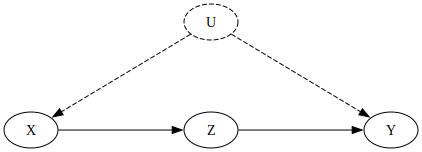

In [21]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['X', 'Z', 'Y', 'U']
positions = ['0,0!', '2.5,0!', '5,0!', '2.5,1.5!']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]

# Overwrite style
graph.node('U', style='dashed')

graph.edge('U', 'X', style='dashed')
graph.edge('U', 'Y', style='dashed')
graph.edge('X', 'Z')
graph.edge('Z', 'Y')

graph.render(f'img/ch_06_gps_03')

graph

### Front-Door in Practice

In [22]:
# First, we'll build a structural causal model (SCM)
class GPSMemorySCM:
    
    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_x = stats.truncnorm(0, np.infty, scale=5)
        self.u_y = stats.norm(scale=2)
        self.u_z = stats.norm(scale=2)
        self.u = stats.truncnorm(0, np.infty, scale=4)
        
    def sample(self, sample_size=100, treatment_value=None):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)
        
        u_x = self.u_x.rvs(sample_size)
        u_y = self.u_y.rvs(sample_size)
        u_z = self.u_z.rvs(sample_size)
        u = self.u.rvs(sample_size)
        
        if treatment_value:
            gps = np.array([treatment_value]*sample_size)
        else:
            gps = u_x + 0.7*u
            
        hippocampus = -0.6*gps + 0.25*u_z
        memory = 0.7*hippocampus + 0.25*u
        
        return gps, hippocampus, memory
    
    def intervene(self, treatment_value, sample_size=100):
        """Intervenes on the SCM"""
        return self.sample(treatment_value=treatment_value, sample_size=sample_size)

In [23]:
# Instantiate the SCM
scm = GPSMemorySCM()

# Generate observational data
gps_obs, hippocampus_obs, memory_obs = scm.sample(600)

# Run an experiment
treatments = []
experiment_results = []

# Sample over various treatments
for treatment in np.arange(1, 21):
    gps_hours, hippocampus, memory = scm.intervene(treatment_value=treatment, sample_size=30)
    experiment_results.append(memory)
    treatments.append(gps_hours)

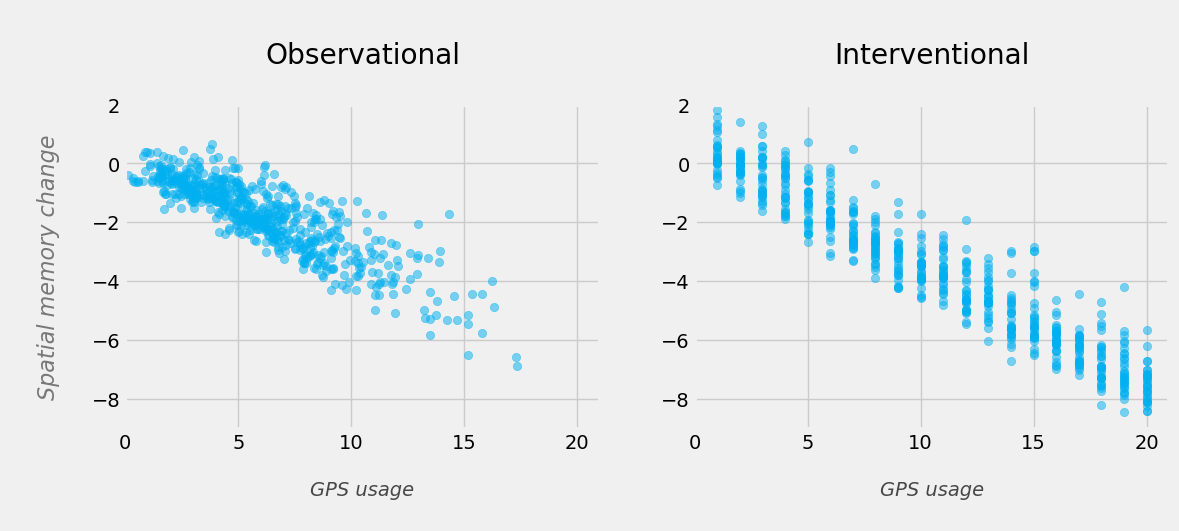

In [24]:
# Plot observational data
plt.figure(figsize=(12, 4))

# Observational
plt.subplot(121)
plt.scatter(gps_obs, memory_obs, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nObservational\n')
plt.xlabel('\nGPS usage', alpha=.7, fontsize=14, style='italic')
plt.ylabel('\nSpatial memory change\n', alpha=.5, fontsize=16, style='italic')


# Interventional
plt.subplot(122)

plt.scatter(treatments, experiment_results, alpha=.5, color=COLORS[0])
plt.xlim(0, 21)
plt.ylim(-9, 2)

plt.title('\nInterventional\n')
plt.xlabel('\nGPS usage\n', alpha=.7, fontsize=14, style='italic')

plt.show()